In [ ]:
!pip install --upgrade scikit-learn


In [ ]:
pip install pmdarima


In [ ]:
!pip install numpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from math import  sqrt
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import statistics as st
from scipy.stats import mode, skew, kurtosis
import seaborn as sns
import random
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout


import pandas as pd
import joblib
import matplotlib.pyplot as plt
import math

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

from keras.models import Sequential
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.preprocessing import sequence
from keras.layers import Dense, LSTM, RNN, GRU, Dropout, Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import skew, kurtosis

from torch import nn
from torch.utils.data import DataLoader, Dataset
from datetime import datetime, timedelta
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings("ignore")

In [ ]:
eth_df = pd.read_csv("/content/BNB-Historical-Data.csv")
eth_df

,Date,Price,Open,High,Low,Vol.,Change %
0,03/01/2024,407.30,399.10,408.48,399.00,595.45K,2.05%
1,02/29/2024,399.10,414.62,419.38,391.24,1.16M,-3.74%
2,02/28/2024,414.62,394.60,426.79,394.30,1.39M,5.02%
3,02/27/2024,394.80,401.60,403.69,390.11,932.13K,-1.69%
4,02/26/2024,401.60,388.50,404.49,382.10,1.23M,3.37%
...,...,...,...,...,...,...,...
1823,03/05/2019,13.65,11.40,13.74,11.40,8.34M,19.61%
1824,03/04/2019,11.41,11.45,11.51,10.88,2.74M,-0.29%
1825,03/03/2019,11.45,11.75,11.86,11.20,2.86M,-2.58%
1826,03/02/2019,11.75,11.35,11.80,10.83,3.89M,3.56%


###Data processing

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

from IPython.display import display
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [ ]:
eth_df['Date'] = pd.to_datetime(eth_df['Date'])
eth_df.reset_index(drop=True)
eth_df.set_index('Date', inplace=True)
eth_df.sort_index(ascending=True, inplace=True)

In [ ]:
# Hàm để chuyển đổi giá trị có 'K', 'M', hoặc 'B' thành số thực.
def convert_volume(value):
    if 'K' in value:
        return float(value.replace('K', '')) * 1e3
    elif 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'B' in value:
        return float(value.replace('B', '')) * 1e9
    else:
        return float(value)

# Áp dụng hàm cho mỗi giá trị trong cột 'Vol.'.
eth_df['Vol.'] = eth_df['Vol.'].apply(convert_volume)

In [ ]:
# Hàm để chuyển đổi giá trị có dấu % thành số thực.
def convert_percent_to_float(value):
    return float(value.replace('%', '')) / 100

# Giả sử etr_df là DataFrame của bạn với cột 'Percentage' cần được chuyển đổi.
# etr_df['Percentage'] = ...

# Áp dụng hàm cho mỗi giá trị trong cột 'Percentage'.
eth_df['Change %'] = eth_df['Change %'].apply(convert_percent_to_float)


In [ ]:
eth_df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,11.35,10.27,11.55,10.24,4020000.0,0.1045
2019-03-02,11.75,11.35,11.80,10.83,3890000.0,0.0356
2019-03-03,11.45,11.75,11.86,11.20,2860000.0,-0.0258
2019-03-04,11.41,11.45,11.51,10.88,2740000.0,-0.0029
2019-03-05,13.65,11.40,13.74,11.40,8340000.0,0.1961
...,...,...,...,...,...,...
2024-02-26,401.60,388.50,404.49,382.10,1230000.0,0.0337
2024-02-27,394.80,401.60,403.69,390.11,932130.0,-0.0169
2024-02-28,414.62,394.60,426.79,394.30,1390000.0,0.0502


In [ ]:
eth_df['Price'] = eth_df['Price'].astype(str).str.replace(',', '').astype(float)
eth_df['Open'] = eth_df['Open'].astype(str).str.replace(',', '').astype(float)
eth_df['High'] = eth_df['High'].astype(str).str.replace(',', '').astype(float)
eth_df['Low'] = eth_df['Low'].astype(str).str.replace(',', '').astype(float)


In [ ]:
#eth_df['Price'] = eth_df['Price'].str.replace(',', '').astype(float)
#eth_df['Open'] = eth_df['Open'].str.replace(',', '').astype(float)
#eth_df['High'] =eth_df['High'].str.replace(',', '').astype(float)
#eth_df['Low'] = eth_df['Low'].str.replace(',', '').astype(float)
#eth_df

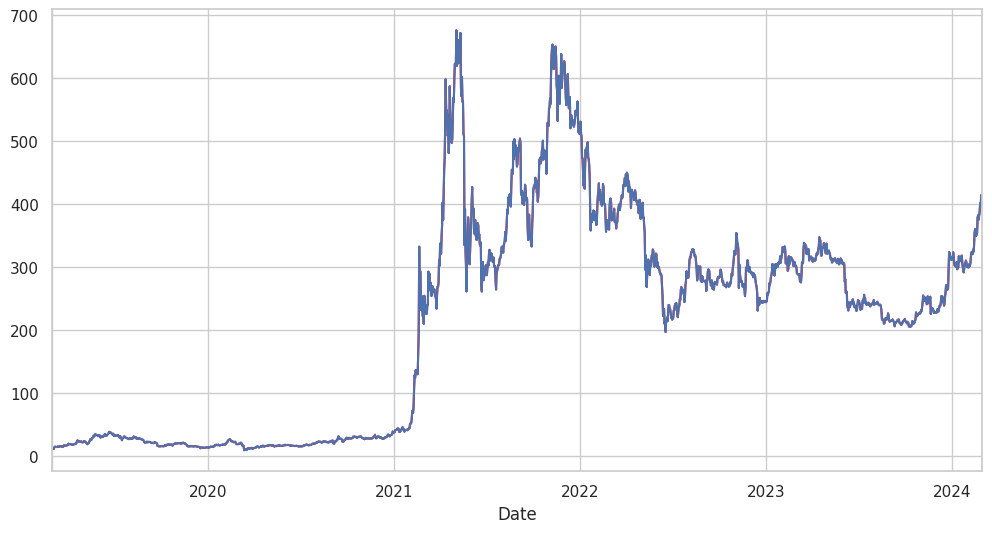

In [ ]:
eth_df['Price'].plot(figsize=(12,6),color='red')

plt.plot(eth_df['Price'])

In [ ]:
eth_df['Price']

Date
2019-03-01     11.35
2019-03-02     11.75
2019-03-03     11.45
2019-03-04     11.41
2019-03-05     13.65
               ...  
2024-02-26    401.60
2024-02-27    394.80
2024-02-28    414.62
2024-02-29    399.10
2024-03-01    407.30
Name: Price, Length: 1828, dtype: float64

##DATE

###Split data 6:4



In [ ]:
window_size = 10
feature_dim = 5

train_size = 0.6
test_size = 0.4

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [ ]:
train_index = int(len(eth_df)*train_size)
train_index

1096

In [ ]:
eth_df_train = eth_df.iloc[:train_index]
eth_df_test  = eth_df[train_index:]

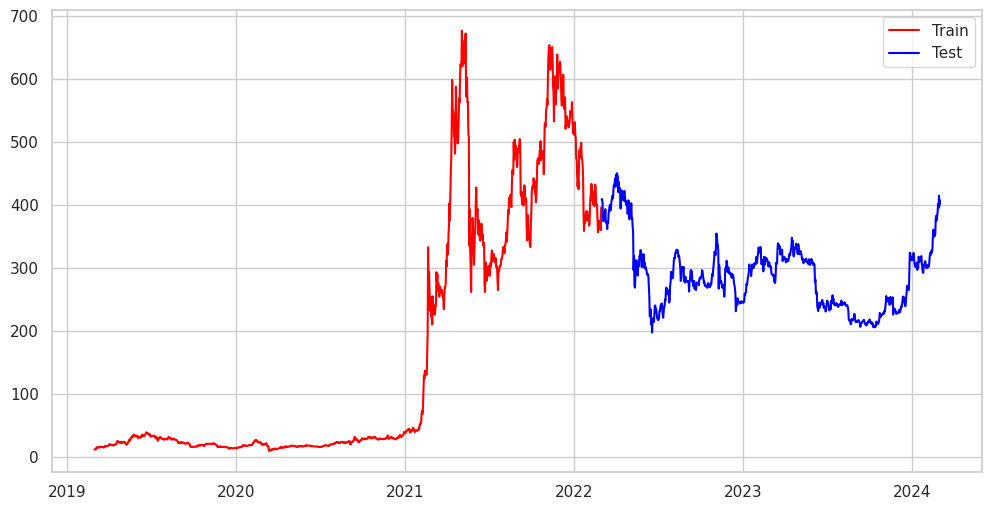

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(eth_df_train).index.to_list(), pd.DataFrame(eth_df_train['Price']), color='red', label='Train')
plt.plot(pd.DataFrame(eth_df_test).index.to_list(),pd.DataFrame(eth_df_test['Price']),color='blue' ,label ='Test')
plt.legend()
plt.show()

In [ ]:
eth_df['Price_diff'] = eth_df['Price'].diff(periods=7)
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2019-03-01 to 2024-03-01
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1828 non-null   float64
 1   Open        1828 non-null   float64
 2   High        1828 non-null   float64
 3   Low         1828 non-null   float64
 4   Vol.        1828 non-null   float64
 5   Change %    1828 non-null   float64
 6   Price_diff  1821 non-null   float64
dtypes: float64(7)
memory usage: 114.2 KB


In [ ]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff
Date,,,,,,,
2019-03-01,11.35,10.27,11.55,10.24,4020000.0,0.1045,NaN
2019-03-02,11.75,11.35,11.80,10.83,3890000.0,0.0356,NaN
2019-03-03,11.45,11.75,11.86,11.20,2860000.0,-0.0258,NaN
2019-03-04,11.41,11.45,11.51,10.88,2740000.0,-0.0029,NaN
2019-03-05,13.65,11.40,13.74,11.40,8340000.0,0.1961,NaN
...,...,...,...,...,...,...,...
2024-02-26,401.60,388.50,404.49,382.10,1230000.0,0.0337,49.90
2024-02-27,394.80,401.60,403.69,390.11,932130.0,-0.0169,40.29
2024-02-28,414.62,394.60,426.79,394.30,1390000.0,0.0502,35.53


In [ ]:
eth_df['Price_diff'].fillna(method='backfill', inplace=True)

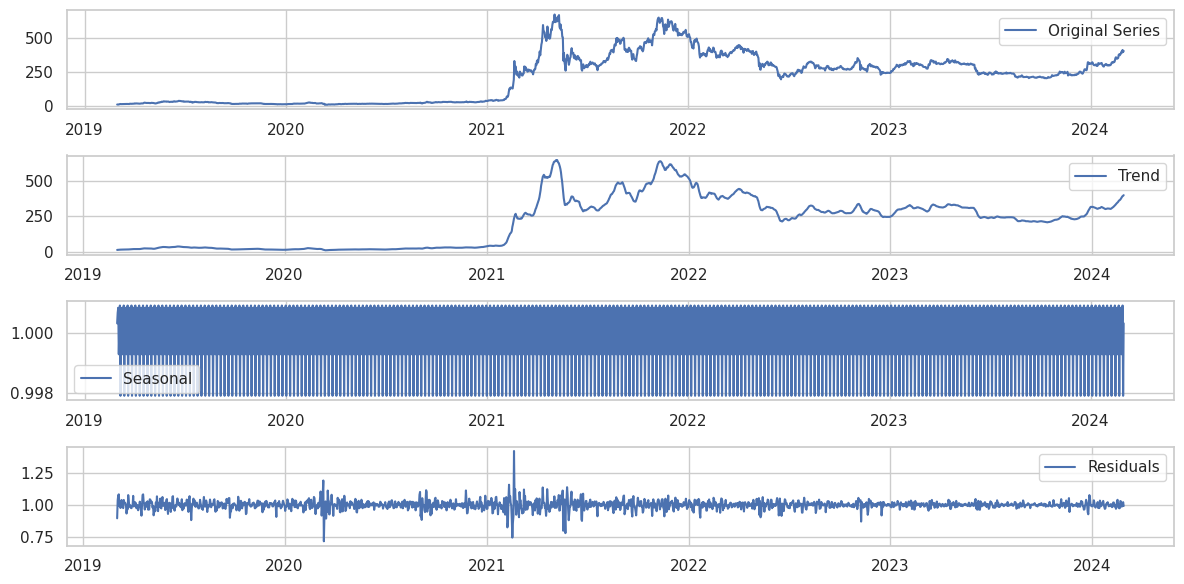

In [ ]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=7)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(12,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
# for fun i guess

In [ ]:
eth_df['month_index'] = eth_df.index.month
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,11.35,10.27,11.55,10.24,4020000.0,0.1045,2.94,3
2019-03-02,11.75,11.35,11.80,10.83,3890000.0,0.0356,2.94,3
2019-03-03,11.45,11.75,11.86,11.20,2860000.0,-0.0258,2.94,3
2019-03-04,11.41,11.45,11.51,10.88,2740000.0,-0.0029,2.94,3
2019-03-05,13.65,11.40,13.74,11.40,8340000.0,0.1961,2.94,3
...,...,...,...,...,...,...,...,...
2024-02-26,401.60,388.50,404.49,382.10,1230000.0,0.0337,49.90,2
2024-02-27,394.80,401.60,403.69,390.11,932130.0,-0.0169,40.29,2
2024-02-28,414.62,394.60,426.79,394.30,1390000.0,0.0502,35.53,2


In [ ]:
df_monthly = eth_df.resample('M').mean()
df_monthly

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-31,14.959677,14.726129,15.253226,14.264194,3.721935e+06,0.018713,1.563871,3.0
2019-04-30,20.614333,20.463333,21.153667,19.689000,2.790667e+06,0.008660,1.350000,4.0
2019-05-31,26.913548,26.549677,27.769032,25.404194,3.359355e+06,0.014574,2.434194,5.0
2019-06-30,33.775333,33.800667,34.811000,32.650333,4.799000e+06,0.000087,0.433667,6.0
2019-07-31,30.068387,30.212258,31.141935,29.064839,3.515161e+06,-0.003690,-1.652903,7.0
...,...,...,...,...,...,...,...,...
2023-11-30,239.862333,239.832667,245.126000,234.689333,8.798903e+05,0.000637,1.136667,11.0
2023-12-31,259.653871,256.931613,263.784516,252.357097,1.038261e+06,0.010677,17.512581,12.0
2024-01-31,307.616774,308.002903,313.546129,300.821613,8.590026e+05,-0.000990,-0.954516,1.0


<Axes: xlabel='Date'>

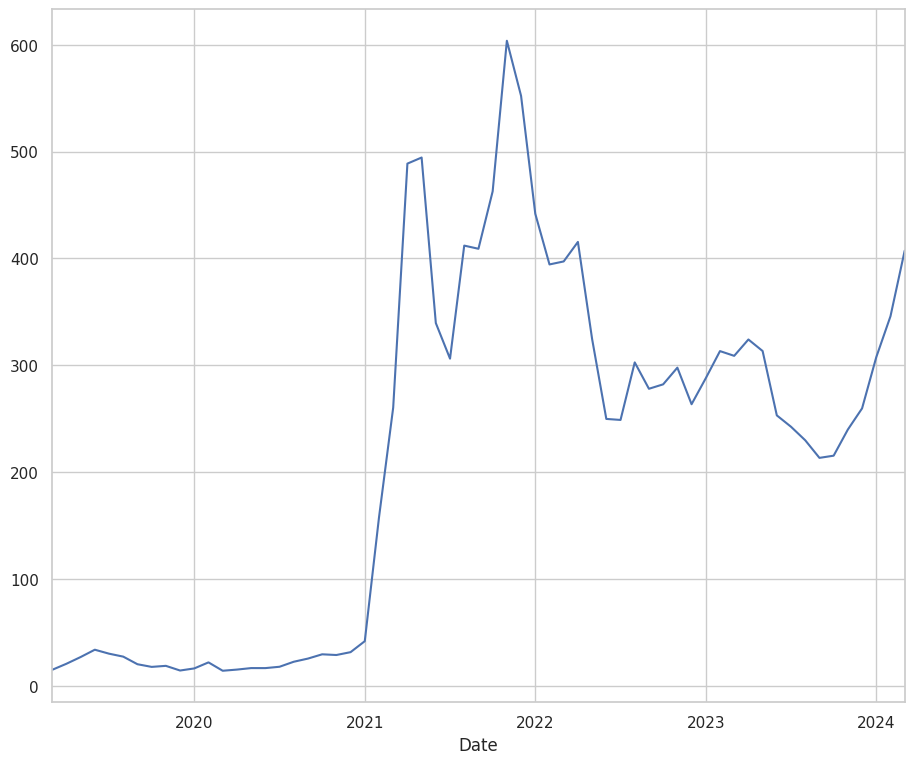

In [ ]:
df_monthly['Price'].plot()

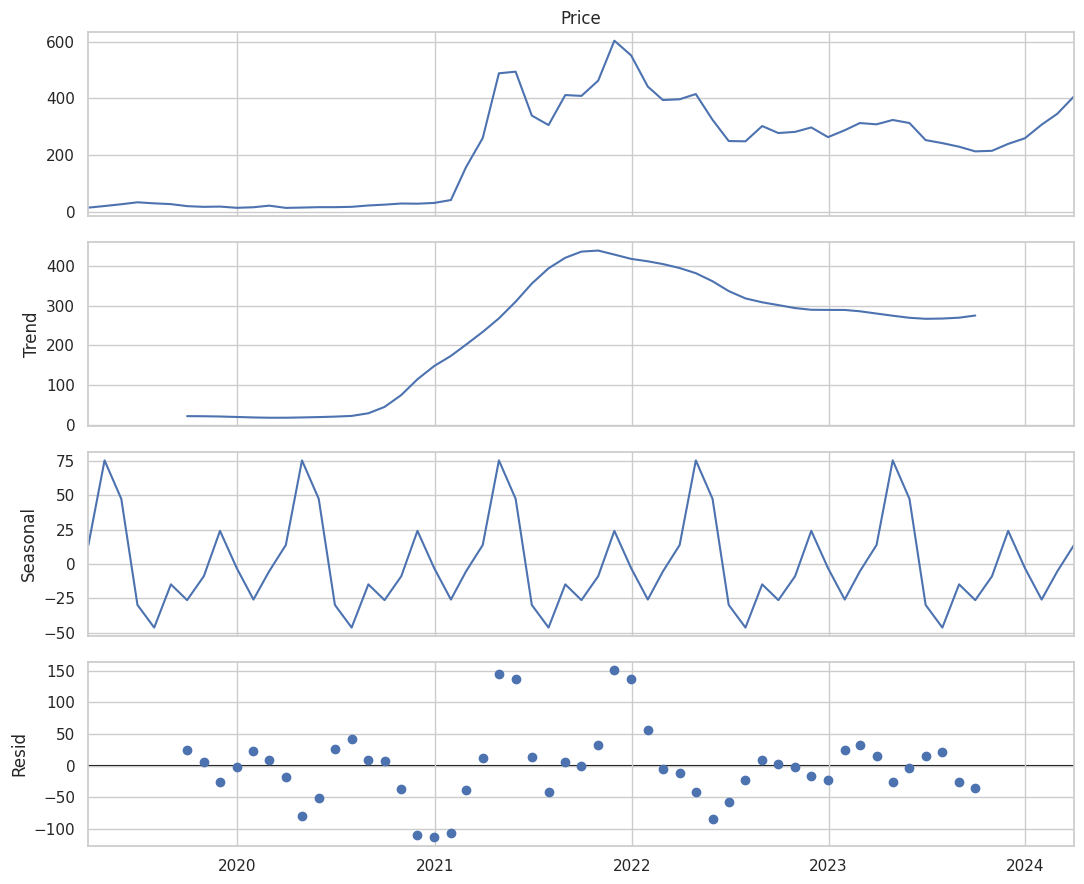

In [ ]:
decompose = seasonal_decompose(df_monthly['Price'])
decompose.plot()

plt.show()

In [ ]:
#import pmdarima as pm
#model = pm.auto_arima(df_monthly['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
					#	d=None, D=1,m=12,
				#		error_action='ignore',
					#	suppress_warnings=True,
				#		stepwise=True)

In [ ]:
train = eth_df_train['Price']
test = eth_df_test['Price']
start = len(train)
end = len(train) +len(test) -1

In [ ]:
import pmdarima as pm
model = pm.auto_arima(train, trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
						d=None, D=1,m=7,max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=18.52 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=11055.515, Time=0.29 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=9504.633, Time=4.27 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=10418.316, Time=2.96 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=11057.392, Time=0.13 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=9741.406, Time=0.41 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=9317.942, Time=10.51 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=17.44 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=2.85 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=11043.839, Time=1.93 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=9307.397, Time=9.00 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=9488.854, Time=2.14 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=12.20 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=5.36 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=9289.865

In [ ]:

model_sarimax = sm.tsa.statespace.SARIMAX(train,
                                          order = (3,0,2),
                                          seasonal_order = (2,1,0,7))
result = model_sarimax.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1096
Model:             SARIMAX(3, 0, 2)x(2, 1, [], 7)   Log Likelihood               -4634.159
Date:                            Wed, 19 Jun 2024   AIC                           9284.318
Time:                                    13:08:08   BIC                           9324.263
Sample:                                03-01-2019   HQIC                          9299.437
                                     - 02-28-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0174      0.048     20.995      0.000       0.922       1.112
ar.L2          0.7038      0.067     10.495      0.000       0.572       0.835
ar.L3         -0.7374      0.044    -16.949      0.000      -0.823      -0.652
ma.L1         -0.1434      0.056     -2.571      0.010      -0.253      -0.034
ma.L2         -0.6564      0.052    -12.506      0.000      -0.759      -0.554
ar.S.L7       -0.6356      0.014    -45.491      0.000      -0.663      -0.608
ar.S.L14      -0.4069      0.013    -32.194      0.000      -0.432      -0.382
sigma2       290.4594      4.775     60.825      0.000     281.100     299.819
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):              8958.38
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):             607.27   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions = result.predict(start, end)
predictions

2022-03-01    395.143058
2022-03-02    401.797775
2022-03-03    389.230427
2022-03-04    390.881043
2022-03-05    390.214214
                 ...    
2024-02-26    389.831944
2024-02-27    401.388742
2024-02-28    400.622879
2024-02-29    388.494716
2024-03-01    392.462933
Freq: D, Name: predicted_mean, Length: 732, dtype: float64

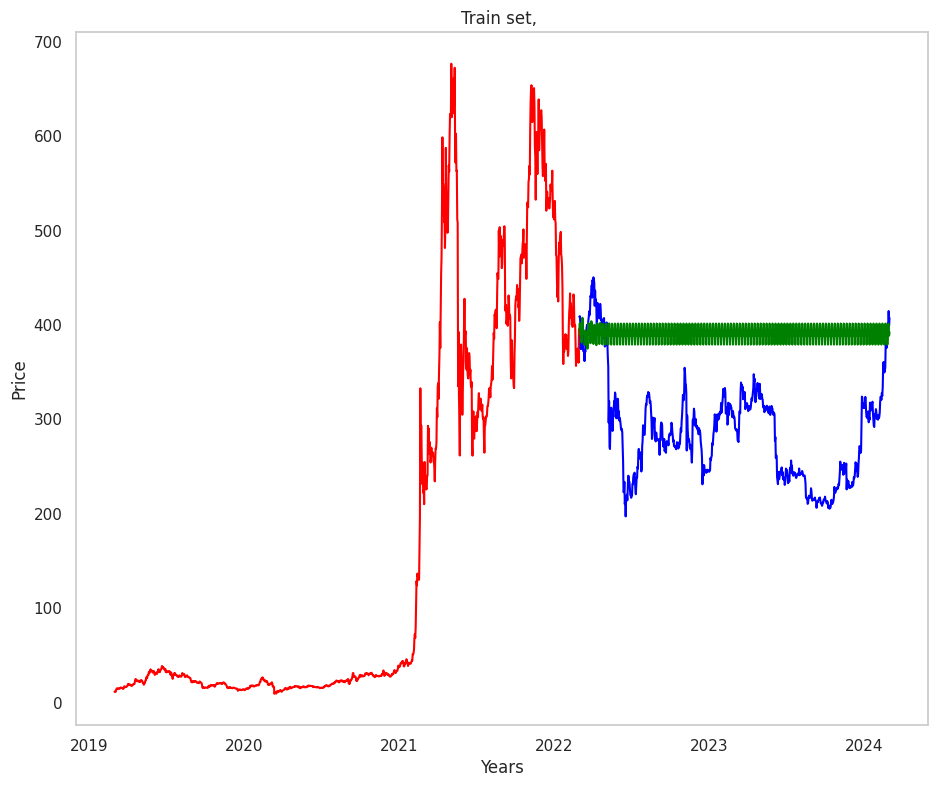

In [ ]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.41457160081656697
MAE =  107.10952886946858
RMSE =  117.47111713971995


In [ ]:
start = len(eth_df)

end = (len(eth_df) - 1) + 30

forecast_30 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

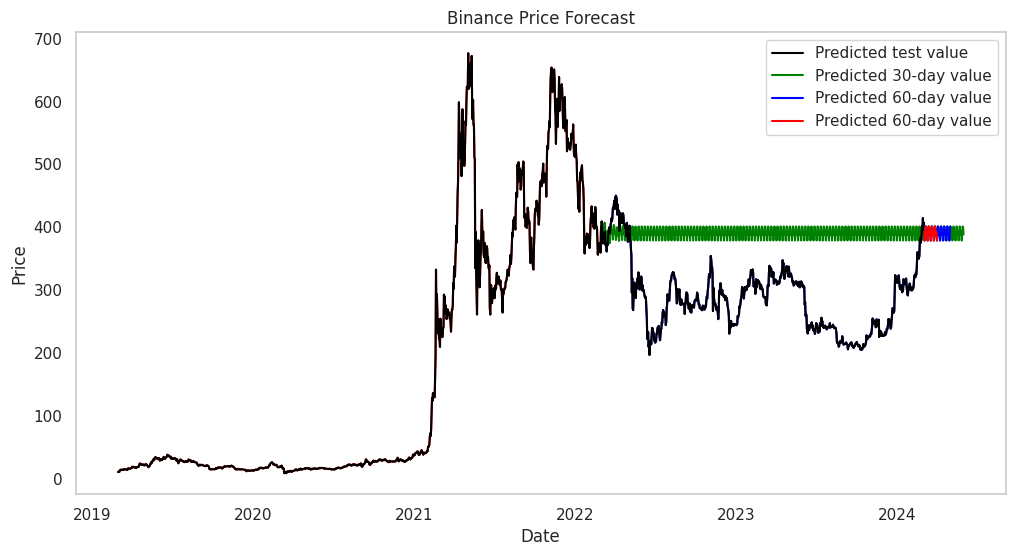

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')


plt.plot(eth_df['Price'], color = 'black', label='Predicted test value')
plt.plot(forecast_90, color = 'green', label='Predicted 30-day value')
plt.plot(forecast_60, color = 'blue', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'red', label='Predicted 60-day value')

# title and axis captions
plt.title("Binance Price Forecast")
plt.ylabel("Price")
plt.xlabel('Date')

# add a legend
plt.legend()

# add a grid
plt.grid()

# display the plot
plt.show()


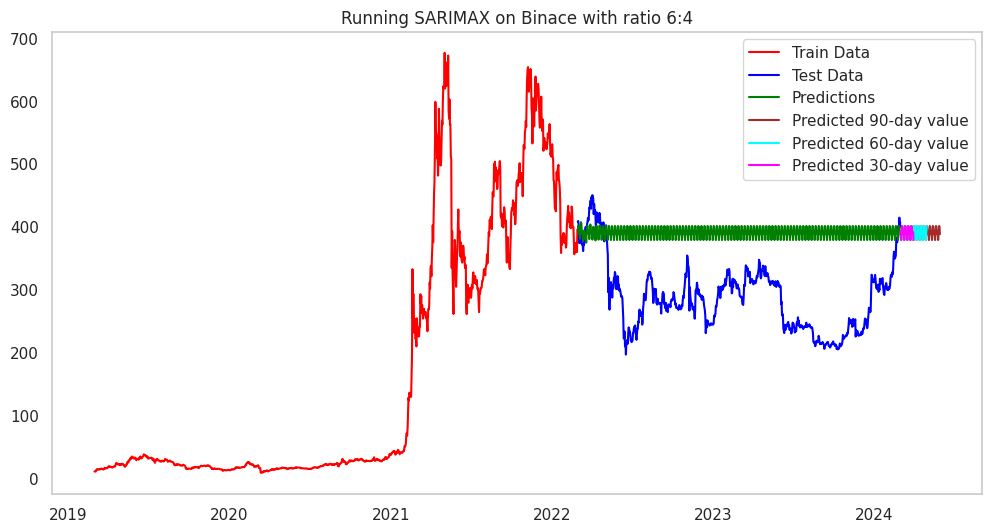

In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_90, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_60, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("Running SARIMAX on Binace with ratio 6:4")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


###Split data 7:3

In [ ]:
window_size = 10
feature_dim = 5

train_size = 0.7
test_size = 0.3

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [ ]:
train_index = int(len(eth_df)*train_size)
train_index

1279

In [ ]:
eth_df_train = eth_df.iloc[:train_index]
eth_df_test  = eth_df[train_index:]

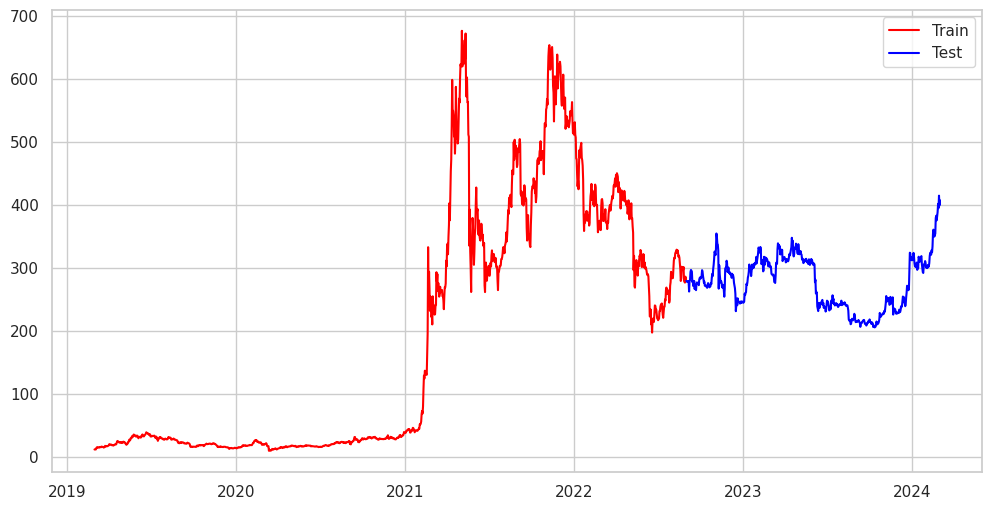

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(eth_df_train).index.to_list(), pd.DataFrame(eth_df_train['Price']), color='red', label='Train')
plt.plot(pd.DataFrame(eth_df_test).index.to_list(),pd.DataFrame(eth_df_test['Price']),color='blue' ,label ='Test')
plt.legend()
plt.show()

In [ ]:
eth_df['Price_diff'] = eth_df['Price'].diff(periods=7)
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2019-03-01 to 2024-03-01
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1828 non-null   float64
 1   Open         1828 non-null   float64
 2   High         1828 non-null   float64
 3   Low          1828 non-null   float64
 4   Vol.         1828 non-null   float64
 5   Change %     1828 non-null   float64
 6   Price_diff   1821 non-null   float64
 7   month_index  1828 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 121.4 KB


In [ ]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,11.35,10.27,11.55,10.24,4020000.0,0.1045,NaN,3
2019-03-02,11.75,11.35,11.80,10.83,3890000.0,0.0356,NaN,3
2019-03-03,11.45,11.75,11.86,11.20,2860000.0,-0.0258,NaN,3
2019-03-04,11.41,11.45,11.51,10.88,2740000.0,-0.0029,NaN,3
2019-03-05,13.65,11.40,13.74,11.40,8340000.0,0.1961,NaN,3
...,...,...,...,...,...,...,...,...
2024-02-26,401.60,388.50,404.49,382.10,1230000.0,0.0337,49.90,2
2024-02-27,394.80,401.60,403.69,390.11,932130.0,-0.0169,40.29,2
2024-02-28,414.62,394.60,426.79,394.30,1390000.0,0.0502,35.53,2


In [ ]:
eth_df['Price_diff'].fillna(method='backfill', inplace=True)

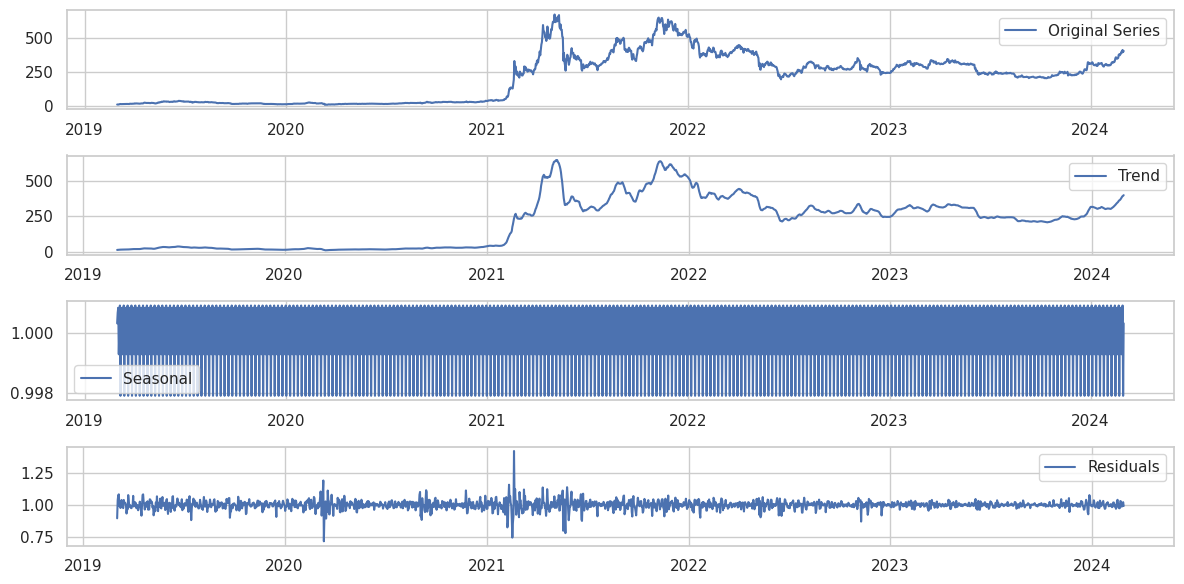

In [ ]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=7)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(12,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
# for fun i guess

In [ ]:
eth_df['month_index'] = eth_df.index.month
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,11.35,10.27,11.55,10.24,4020000.0,0.1045,2.94,3
2019-03-02,11.75,11.35,11.80,10.83,3890000.0,0.0356,2.94,3
2019-03-03,11.45,11.75,11.86,11.20,2860000.0,-0.0258,2.94,3
2019-03-04,11.41,11.45,11.51,10.88,2740000.0,-0.0029,2.94,3
2019-03-05,13.65,11.40,13.74,11.40,8340000.0,0.1961,2.94,3
...,...,...,...,...,...,...,...,...
2024-02-26,401.60,388.50,404.49,382.10,1230000.0,0.0337,49.90,2
2024-02-27,394.80,401.60,403.69,390.11,932130.0,-0.0169,40.29,2
2024-02-28,414.62,394.60,426.79,394.30,1390000.0,0.0502,35.53,2


In [ ]:
df_monthly = eth_df.resample('M').mean()
df_monthly

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-31,14.959677,14.726129,15.253226,14.264194,3.721935e+06,0.018713,1.563871,3.0
2019-04-30,20.614333,20.463333,21.153667,19.689000,2.790667e+06,0.008660,1.350000,4.0
2019-05-31,26.913548,26.549677,27.769032,25.404194,3.359355e+06,0.014574,2.434194,5.0
2019-06-30,33.775333,33.800667,34.811000,32.650333,4.799000e+06,0.000087,0.433667,6.0
2019-07-31,30.068387,30.212258,31.141935,29.064839,3.515161e+06,-0.003690,-1.652903,7.0
...,...,...,...,...,...,...,...,...
2023-11-30,239.862333,239.832667,245.126000,234.689333,8.798903e+05,0.000637,1.136667,11.0
2023-12-31,259.653871,256.931613,263.784516,252.357097,1.038261e+06,0.010677,17.512581,12.0
2024-01-31,307.616774,308.002903,313.546129,300.821613,8.590026e+05,-0.000990,-0.954516,1.0


<Axes: xlabel='Date'>

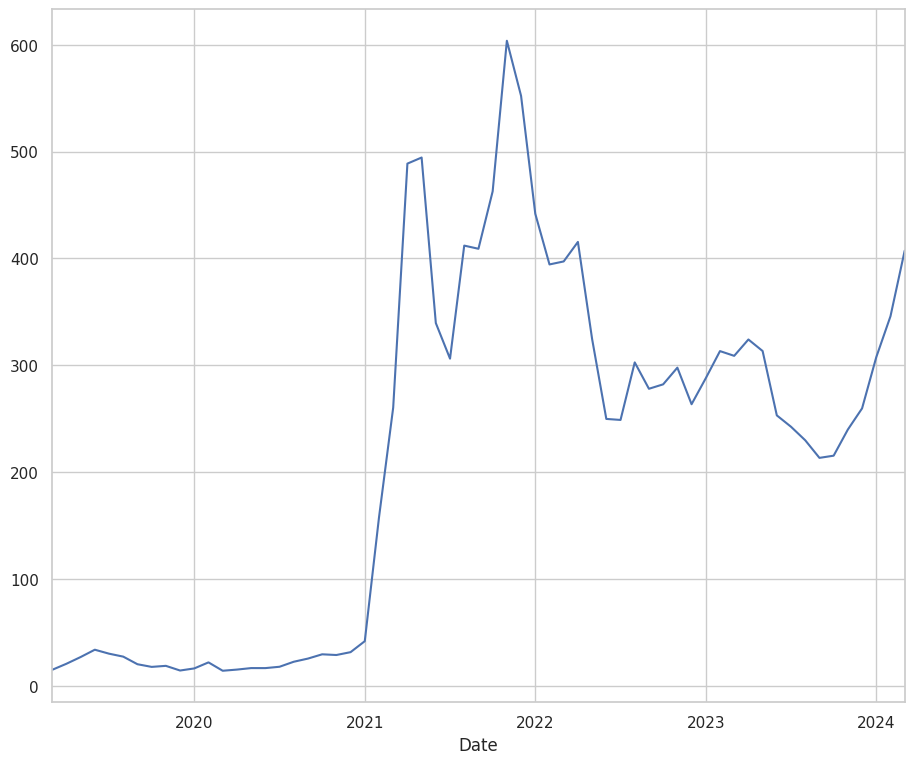

In [ ]:
df_monthly['Price'].plot()

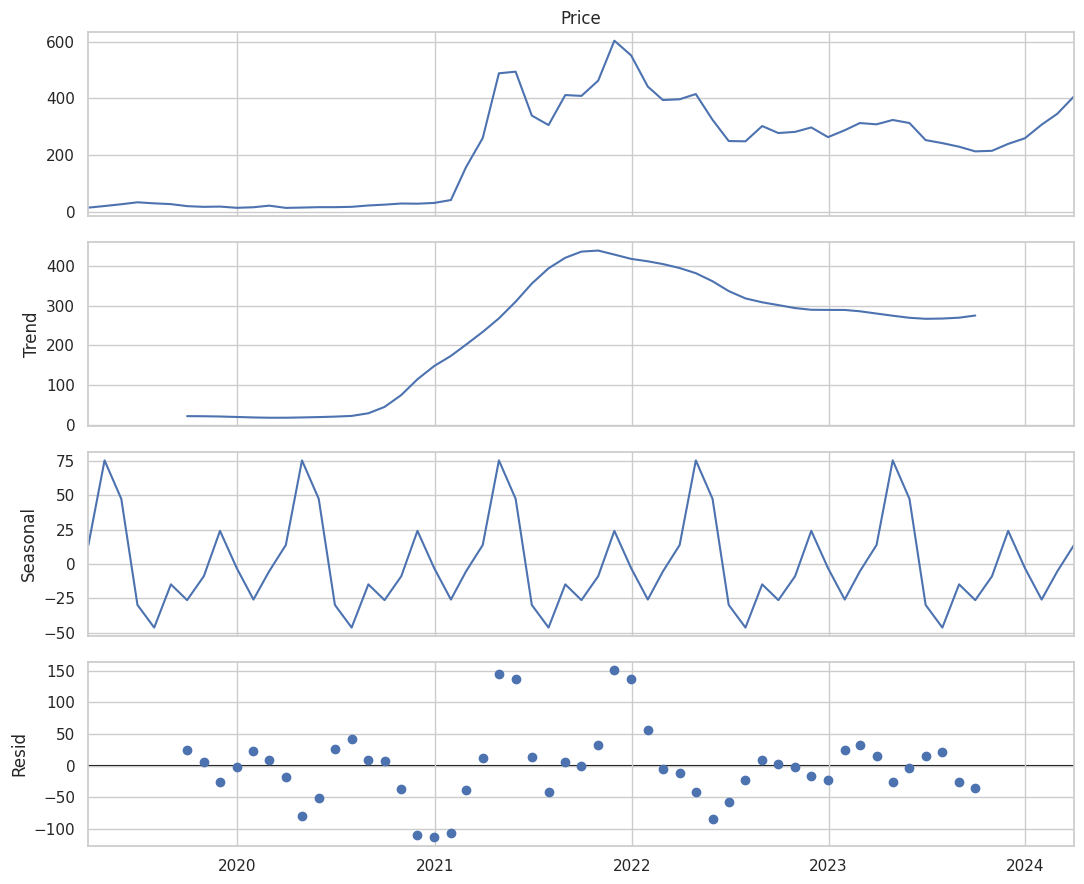

In [ ]:
decompose = seasonal_decompose(df_monthly['Price'])
decompose.plot()

plt.show()

In [ ]:
#import pmdarima as pm
#model = pm.auto_arima(df_monthly['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
					#	d=None, D=1,m=12,
				#		error_action='ignore',
					#	suppress_warnings=True,
				#		stepwise=True)

In [ ]:
train = eth_df_train['Price']
test = eth_df_test['Price']
start = len(train)
end = len(train) +len(test) -1

In [ ]:
import pmdarima as pm
model = pm.auto_arima(train, trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
						d=None, D=1,m=7,max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=10.05 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=12843.845, Time=0.13 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=11030.731, Time=3.76 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=12093.100, Time=4.81 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=12843.866, Time=0.17 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=11309.237, Time=0.40 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=10816.129, Time=7.46 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=7.31 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=7.38 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=12834.324, Time=2.66 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=10802.111, Time=8.16 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=11010.432, Time=3.58 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=14.56 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=4.91 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=10779

In [ ]:
# let's train the model with the appropriate parameters, SARIMAX(0, 2, 2)x(0, 2, 2, 12)
# importing the model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# let's create an object of this model
model = SARIMAX(train,
                order = (3, 0, 0),
                seasonal_order = (2,1,0,7),
                enforce_stationarity = False,
                enforce_invertibility = False)

# apply the method fit
result = model.fit(maxiter = 500, method = 'nm')

Optimization terminated successfully.
         Current function value: 4.156848
         Iterations: 366
         Function evaluations: 576


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Price   No. Observations:                 1279
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 7)   Log Likelihood               -5316.609
Date:                           Wed, 19 Jun 2024   AIC                          10645.218
Time:                                   12:17:12   BIC                          10676.028
Sample:                               03-01-2019   HQIC                         10656.798
                                    - 08-30-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8494      0.015     56.233      0.000       0.820       0.879
ar.L2          0.2276      0.019     11.834      0.000       0.190       0.265
ar.L3         -0.1389      0.013    -10.667      0.000      -0.164      -0.113
ar.S.L7       -0.6507      0.010    -62.779      0.000      -0.671      -0.630
ar.S.L14      -0.4003      0.012    -34.765      0.000      -0.423      -0.378
sigma2       280.0031      4.419     63.360      0.000     271.342     288.665
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              9656.14
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):             264.31   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions = result.predict(start, end)
predictions

2022-08-31    283.438974
2022-09-01    281.900639
2022-09-02    273.305769
2022-09-03    273.956994
2022-09-04    276.979405
                 ...    
2024-02-26    270.377684
2024-02-27    268.992095
2024-02-28    268.923188
2024-02-29    269.530132
2024-03-01    256.081925
Freq: D, Name: predicted_mean, Length: 549, dtype: float64

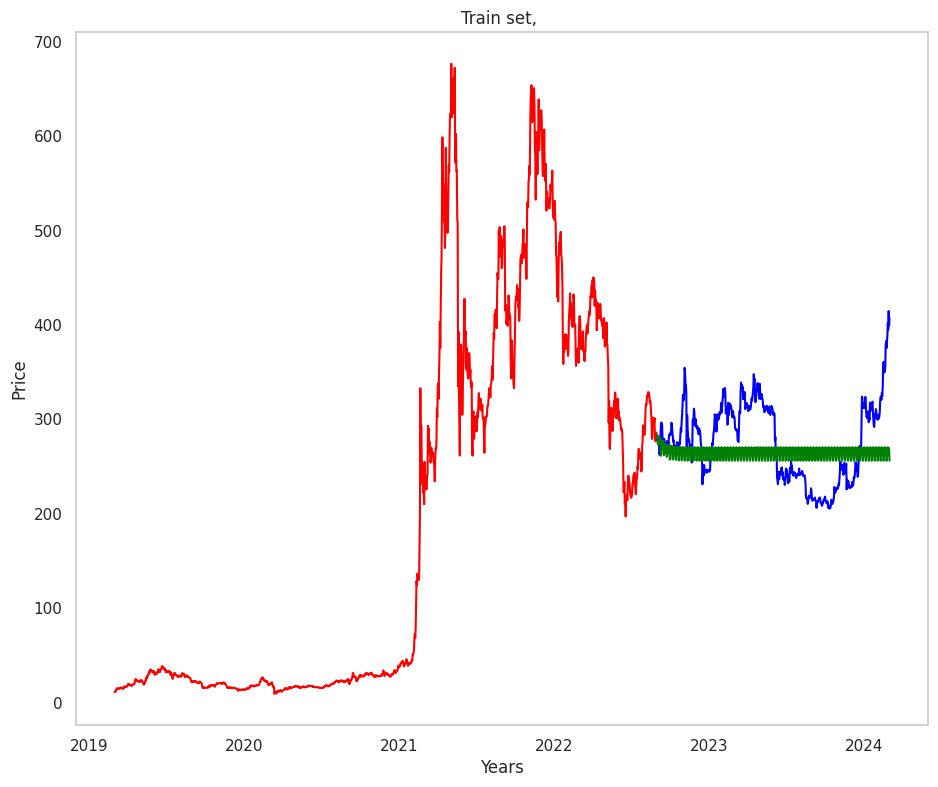

In [ ]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from sklearn.metrics import mean_squared_error

print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.1325405534670396
MAE =  36.96786942497362
RMSE =  43.67535919987284


In [ ]:
start = len(eth_df)

end = (len(eth_df) - 1) + 30

forecast_30 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

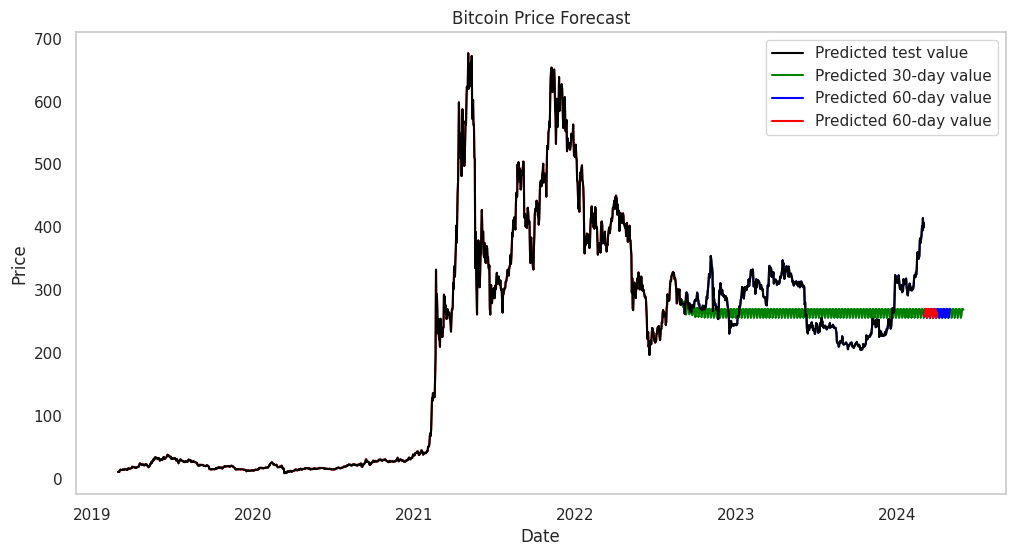

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')


plt.plot(eth_df['Price'], color = 'black', label='Predicted test value')
plt.plot(forecast_90, color = 'green', label='Predicted 30-day value')
plt.plot(forecast_60, color = 'blue', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'red', label='Predicted 60-day value')

# title and axis captions
plt.title("Bitcoin Price Forecast")
plt.ylabel("Price")
plt.xlabel('Date')

# add a legend
plt.legend()

# add a grid
plt.grid()

# display the plot
plt.show()


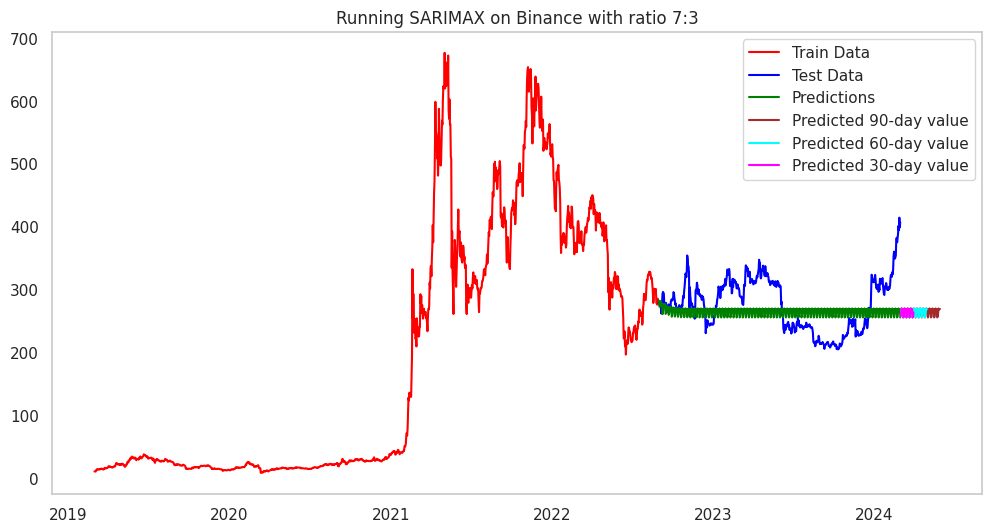

In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_90, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_60, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("Running SARIMAX on Binance with ratio 7:3")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


###Split data 8:2



In [ ]:
window_size = 10
feature_dim = 5

train_size = 0.8
test_size = 0.2

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [ ]:
train_index = int(len(eth_df)*train_size)
train_index

1462

In [ ]:
eth_df_train = eth_df.iloc[:train_index]
eth_df_test  = eth_df[train_index:]

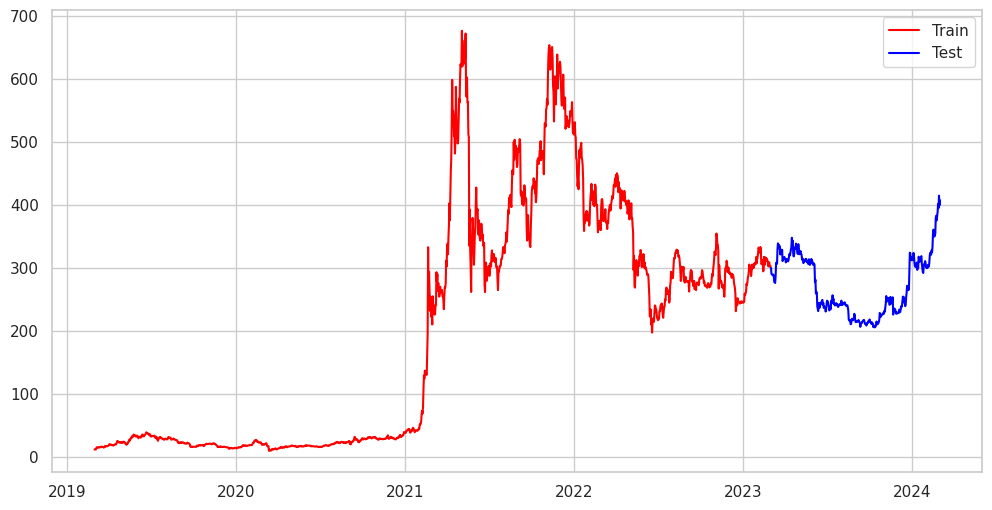

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(eth_df_train).index.to_list(), pd.DataFrame(eth_df_train['Price']), color='red', label='Train')
plt.plot(pd.DataFrame(eth_df_test).index.to_list(),pd.DataFrame(eth_df_test['Price']),color='blue' ,label ='Test')
plt.legend()
plt.show()

In [ ]:
eth_df['Price_diff'] = eth_df['Price'].diff(periods=7)
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2019-03-01 to 2024-03-01
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1828 non-null   float64
 1   Open        1828 non-null   float64
 2   High        1828 non-null   float64
 3   Low         1828 non-null   float64
 4   Vol.        1828 non-null   float64
 5   Change %    1828 non-null   float64
 6   Price_diff  1821 non-null   float64
dtypes: float64(7)
memory usage: 114.2 KB


In [ ]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff
Date,,,,,,,
2019-03-01,11.35,10.27,11.55,10.24,4020000.0,0.1045,NaN
2019-03-02,11.75,11.35,11.80,10.83,3890000.0,0.0356,NaN
2019-03-03,11.45,11.75,11.86,11.20,2860000.0,-0.0258,NaN
2019-03-04,11.41,11.45,11.51,10.88,2740000.0,-0.0029,NaN
2019-03-05,13.65,11.40,13.74,11.40,8340000.0,0.1961,NaN
...,...,...,...,...,...,...,...
2024-02-26,401.60,388.50,404.49,382.10,1230000.0,0.0337,49.90
2024-02-27,394.80,401.60,403.69,390.11,932130.0,-0.0169,40.29
2024-02-28,414.62,394.60,426.79,394.30,1390000.0,0.0502,35.53


In [ ]:
eth_df['Price_diff'].fillna(method='backfill', inplace=True)

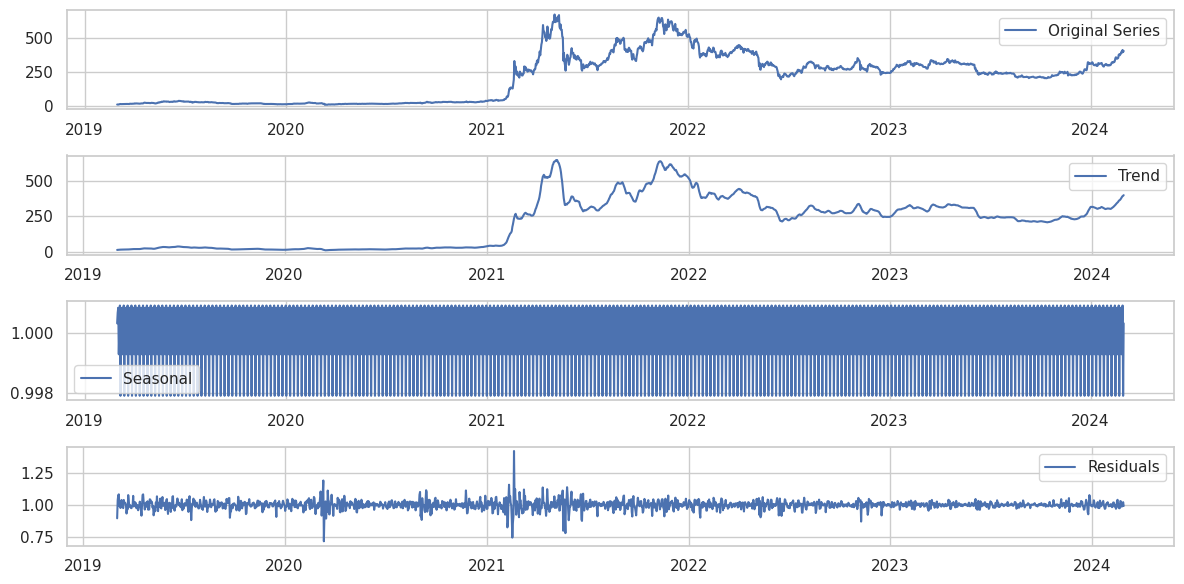

In [ ]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=7)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(12,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
# for fun i guess

In [ ]:
eth_df['month_index'] = eth_df.index.month
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,11.35,10.27,11.55,10.24,4020000.0,0.1045,2.94,3
2019-03-02,11.75,11.35,11.80,10.83,3890000.0,0.0356,2.94,3
2019-03-03,11.45,11.75,11.86,11.20,2860000.0,-0.0258,2.94,3
2019-03-04,11.41,11.45,11.51,10.88,2740000.0,-0.0029,2.94,3
2019-03-05,13.65,11.40,13.74,11.40,8340000.0,0.1961,2.94,3
...,...,...,...,...,...,...,...,...
2024-02-26,401.60,388.50,404.49,382.10,1230000.0,0.0337,49.90,2
2024-02-27,394.80,401.60,403.69,390.11,932130.0,-0.0169,40.29,2
2024-02-28,414.62,394.60,426.79,394.30,1390000.0,0.0502,35.53,2


In [ ]:
df_monthly = eth_df.resample('M').mean()
df_monthly

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-31,14.959677,14.726129,15.253226,14.264194,3.721935e+06,0.018713,1.563871,3.0
2019-04-30,20.614333,20.463333,21.153667,19.689000,2.790667e+06,0.008660,1.350000,4.0
2019-05-31,26.913548,26.549677,27.769032,25.404194,3.359355e+06,0.014574,2.434194,5.0
2019-06-30,33.775333,33.800667,34.811000,32.650333,4.799000e+06,0.000087,0.433667,6.0
2019-07-31,30.068387,30.212258,31.141935,29.064839,3.515161e+06,-0.003690,-1.652903,7.0
...,...,...,...,...,...,...,...,...
2023-11-30,239.862333,239.832667,245.126000,234.689333,8.798903e+05,0.000637,1.136667,11.0
2023-12-31,259.653871,256.931613,263.784516,252.357097,1.038261e+06,0.010677,17.512581,12.0
2024-01-31,307.616774,308.002903,313.546129,300.821613,8.590026e+05,-0.000990,-0.954516,1.0


<Axes: xlabel='Date'>

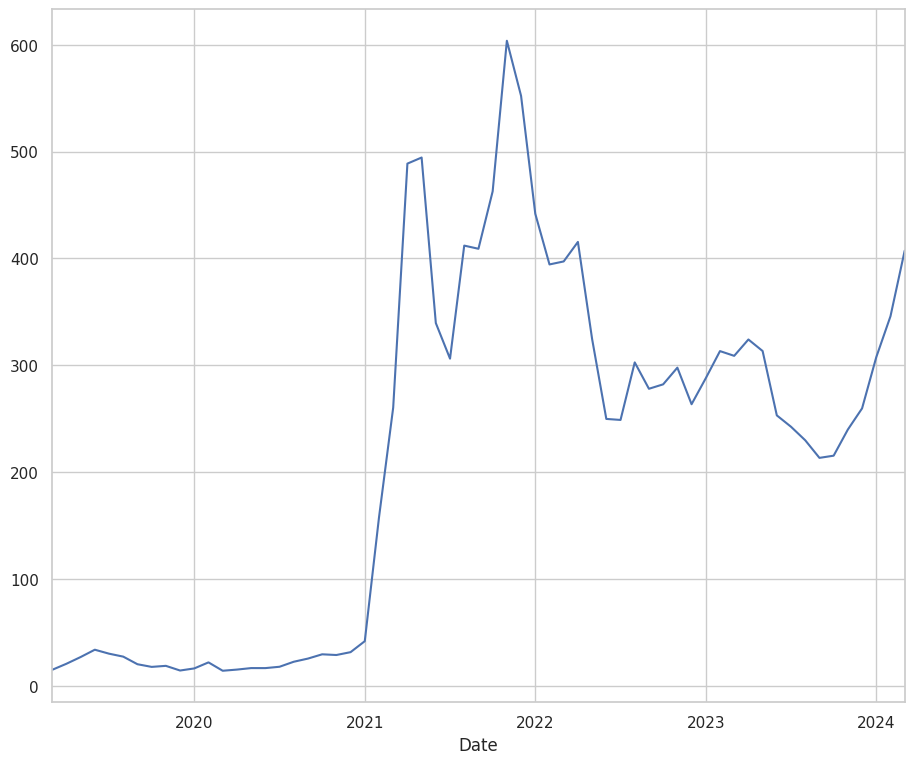

In [ ]:
df_monthly['Price'].plot()

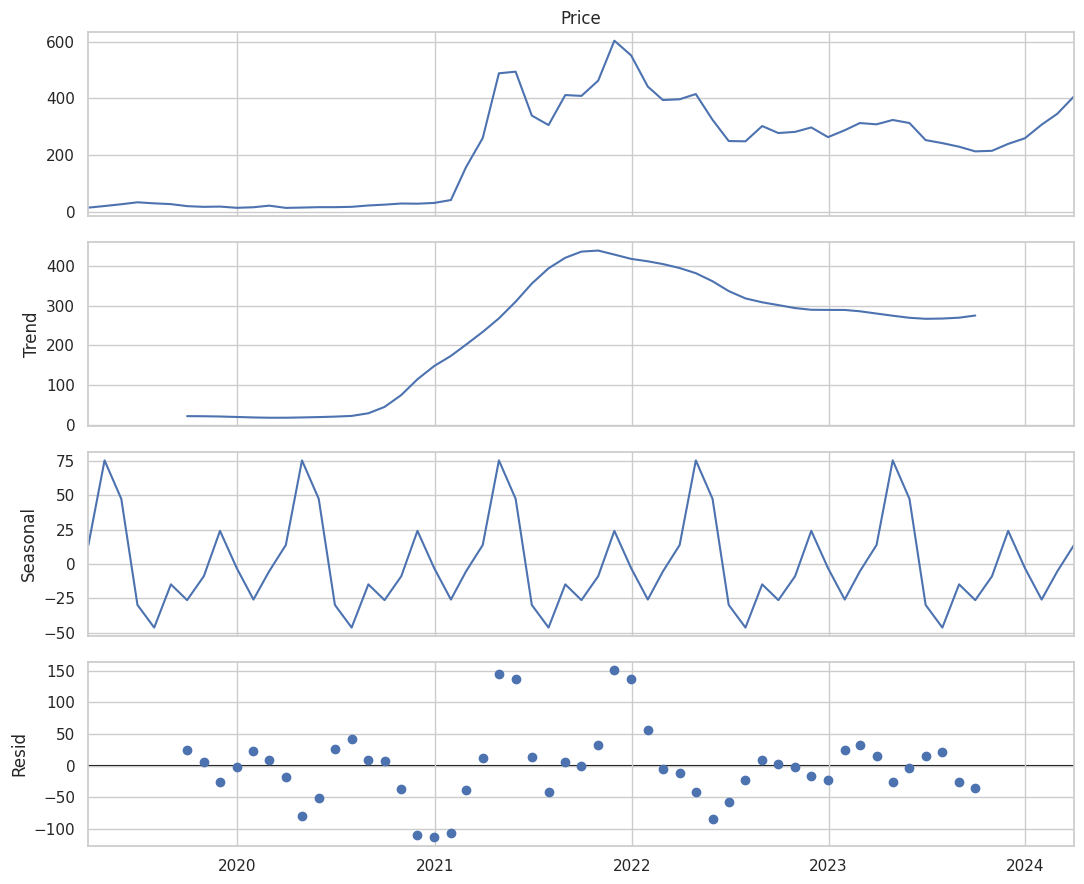

In [ ]:
decompose = seasonal_decompose(df_monthly['Price'])
decompose.plot()

plt.show()

In [ ]:
#import pmdarima as pm
#model = pm.auto_arima(df_monthly['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
					#	d=None, D=1,m=12,
				#		error_action='ignore',
					#	suppress_warnings=True,
				#		stepwise=True)

In [ ]:
train = eth_df_train['Price']
test = eth_df_test['Price']
start = len(train)
end = len(train) +len(test) -1

In [ ]:
import pmdarima as pm
model = pm.auto_arima(train, trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
						d=None, D=1,m=7,max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=10.78 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=14566.033, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=12498.821, Time=3.30 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=13701.409, Time=1.82 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=14566.234, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=12809.761, Time=0.26 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=12256.542, Time=6.20 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=9.79 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=7.11 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=14554.057, Time=4.16 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=12240.503, Time=8.30 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=12476.480, Time=3.63 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=14.08 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=6.63 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=12217

In [ ]:
# let's train the model with the appropriate parameters, SARIMAX(0, 2, 2)x(0, 2, 2, 12)
# importing the model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# let's create an object of this model
model = SARIMAX(train,
                order = (3, 0, 0),
                seasonal_order = (2,1,0,7),
                enforce_stationarity = False,
                enforce_invertibility = False)

# apply the method fit
result = model.fit(maxiter = 500, method = 'nm')

Optimization terminated successfully.
         Current function value: 4.128887
         Iterations: 345
         Function evaluations: 524


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Price   No. Observations:                 1462
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 7)   Log Likelihood               -6036.432
Date:                           Wed, 19 Jun 2024   AIC                          12084.864
Time:                                   12:07:28   BIC                          12116.490
Sample:                               03-01-2019   HQIC                         12096.671
                                    - 03-01-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8472      0.014     61.105      0.000       0.820       0.874
ar.L2          0.2196      0.018     12.487      0.000       0.185       0.254
ar.L3         -0.1303      0.012    -10.853      0.000      -0.154      -0.107
ar.S.L7       -0.6407      0.010    -67.105      0.000      -0.659      -0.622
ar.S.L14      -0.3971      0.011    -37.258      0.000      -0.418      -0.376
sigma2       259.2319      3.753     69.066      0.000     251.875     266.588
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):             12066.50
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):             205.20   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions = result.predict(start, end)
predictions

2023-03-02    289.728397
2023-03-03    290.278066
2023-03-04    293.929959
2023-03-05    297.010861
2023-03-06    290.037278
                 ...    
2024-02-26    289.309457
2024-02-27    287.948594
2024-02-28    294.169031
2024-02-29    284.847737
2024-03-01    285.834501
Freq: D, Name: predicted_mean, Length: 366, dtype: float64

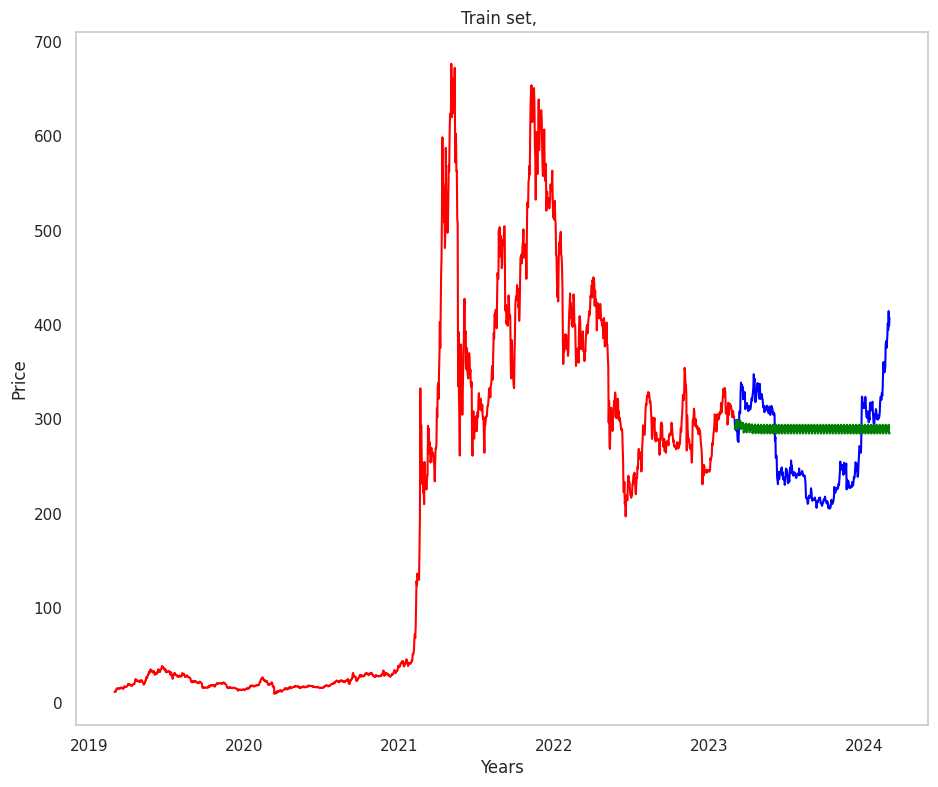

In [ ]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error


print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.17984509484908498
MAE =  45.231426021664795
RMSE =  50.979470177875136


In [ ]:
start = len(eth_df)

end = (len(eth_df) - 1) + 30

forecast_30 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

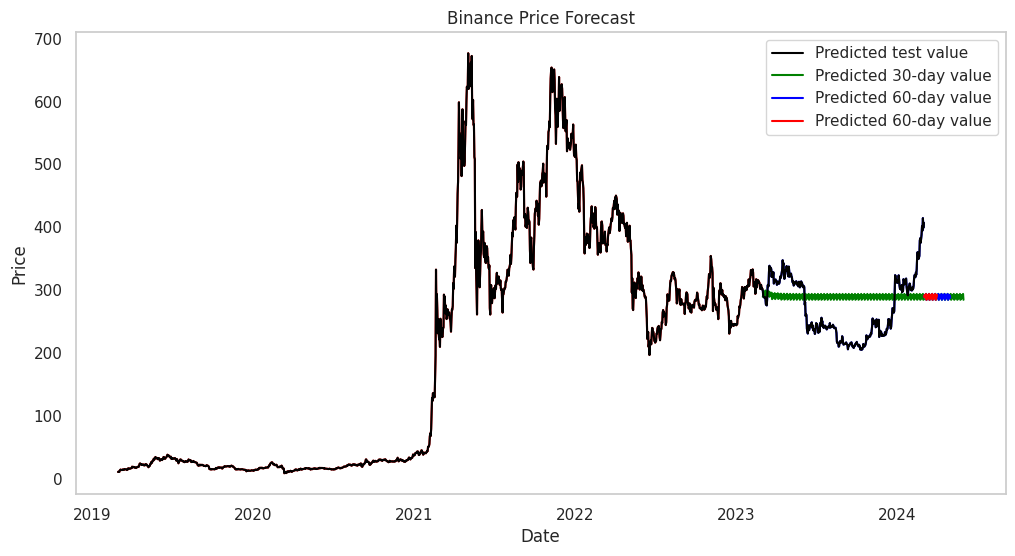

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')


plt.plot(eth_df['Price'], color = 'black', label='Predicted test value')
plt.plot(forecast_90, color = 'green', label='Predicted 30-day value')
plt.plot(forecast_60, color = 'blue', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'red', label='Predicted 60-day value')

# title and axis captions
plt.title("Binance Price Forecast")
plt.ylabel("Price")
plt.xlabel('Date')

# add a legend
plt.legend()

# add a grid
plt.grid()

# display the plot
plt.show()


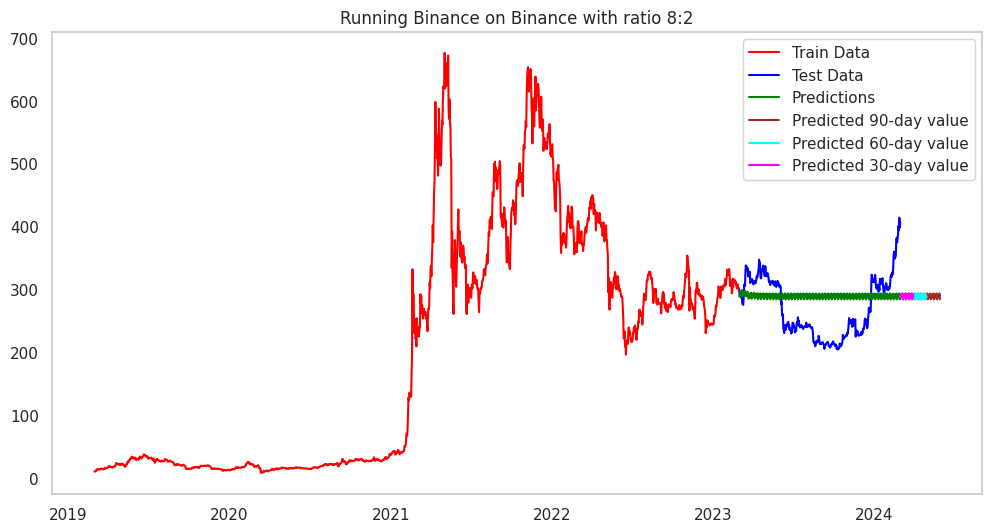

In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_90, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_60, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("Running Binance on Binance with ratio 8:2")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


##MONTH

###Split data with ratio 6:4

In [ ]:
window_size = 10
feature_dim = 5

train_size = 0.6
test_size = 0.4

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [ ]:
df = eth_df[['Price']].copy()


In [ ]:
df_monthly = df.resample('M').mean() # changing the step from "daily on weekdays" to "monthly average"
df_monthly.head()

,Price
Date,
2019-03-31,14.959677
2019-04-30,20.614333
2019-05-31,26.913548
2019-06-30,33.775333
2019-07-31,30.068387


<Axes: xlabel='Date'>

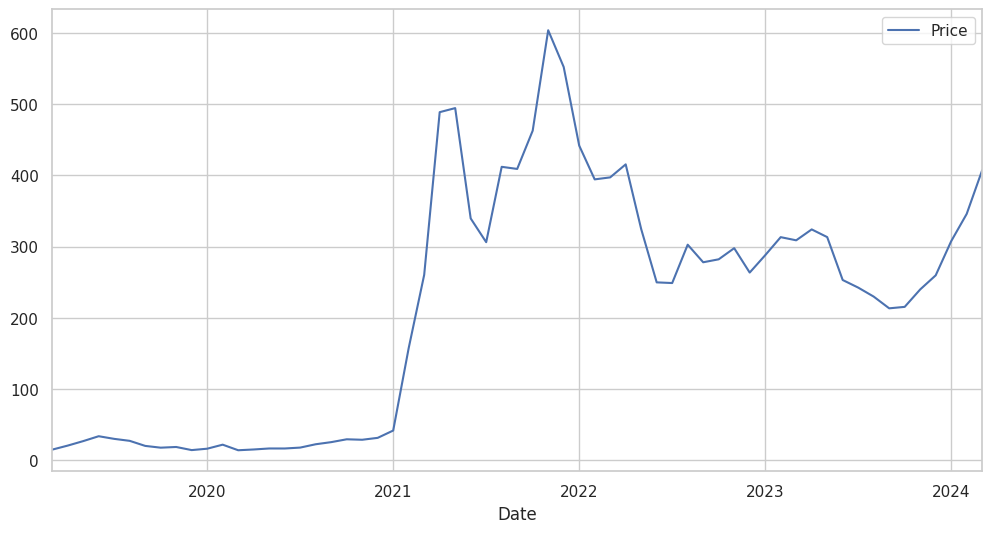

In [ ]:
# Let's plot our data
df_monthly.plot()

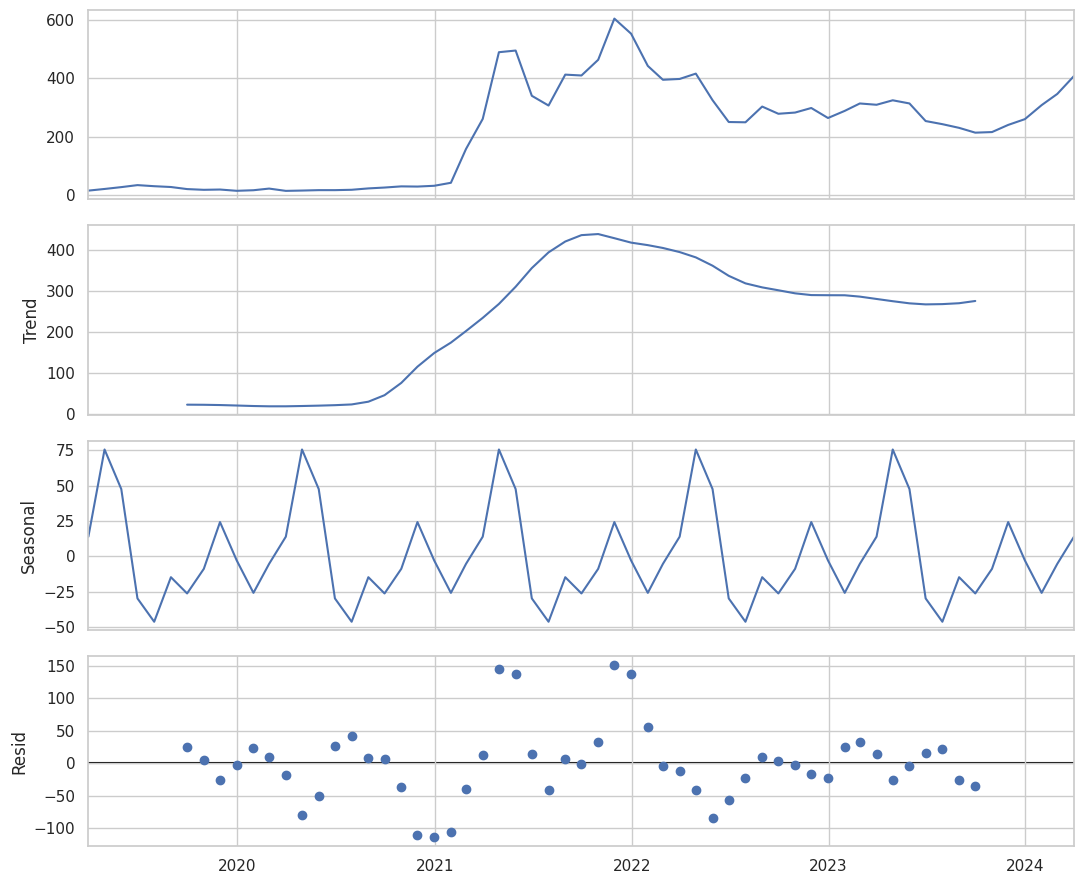

In [ ]:
# importing the seasonal_decompose function from statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# setting the size of the graph
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

# applying the function to the data
decompose = seasonal_decompose(df_monthly)
decompose.plot()

plt.show()

In [ ]:
train_index = int(len(df_monthly)*train_size)
train_index

36

In [ ]:
len(df_monthly)

61

In [ ]:
print(len(train))

36


In [ ]:
print(len(test))

25


In [ ]:
# the training set will include data up to and including December 2016
train = df_monthly[:train_index]

# test set will start from January 2017 (essentially one year)
test = df_monthly[train_index:]

In [ ]:
print(len(train))


36


In [ ]:
print(len(test))

25


In [ ]:
# forcibly disable system warnings
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

# let's train the model with the appropriate parameters, SARIMAX(0, 2, 2)x(0, 2, 2, 12)
# importing the model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# let's create an object of this model
model = SARIMAX(train,
                 order = (3,0,2),
                seasonal_order = (2,1,0,7),
                enforce_stationarity = False,
                enforce_invertibility = False)

# apply the method fit
result = model.fit(maxiter = 500, method = 'nm')


Optimization terminated successfully.
         Current function value: 1.954181
         Iterations: 451
         Function evaluations: 684


In [ ]:
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Price   No. Observations:                   36
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 7)   Log Likelihood                 -70.351
Date:                           Wed, 19 Jun 2024   AIC                            152.701
Time:                                   11:46:19   BIC                            155.610
Sample:                               03-31-2019   HQIC                           151.624
                                    - 02-28-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3252      0.596      2.222      0.026       0.156       2.494
ar.L2         -0.6134      0.821     -0.747      0.455      -2.223       0.996
ar.L3          0.2696      0.401      0.673      0.501      -0.516       1.055
ar.S.L7       -0.5201      1.025     -0.507      0.612      -2.530       1.489
ar.S.L14      -1.3196      8.028     -0.164      0.869     -17.054      14.414
sigma2      7238.7801   6032.552      1.200      0.230   -4584.805    1.91e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 4.15
Prob(Q):                              0.77   Prob(JB):                         0.13
Heteroskedasticity (H):               0.04   Skew:                             1.26
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# the test forecast period will start from the end of the training period
start = len(train)

# and it will end at the end of the test
end = len(train) + len(test) - 1

# apply the method predict
predictions = result.predict(start, end)
predictions

2022-03-31    431.784946
2022-04-30    341.542272
2022-05-31    288.751440
2022-06-30    171.766111
2022-07-31    141.913130
                 ...    
2023-11-30    705.964814
2023-12-31    835.433318
2024-01-31    682.809991
2024-02-29    626.451955
2024-03-31    528.282152
Freq: M, Name: predicted_mean, Length: 25, dtype: float64

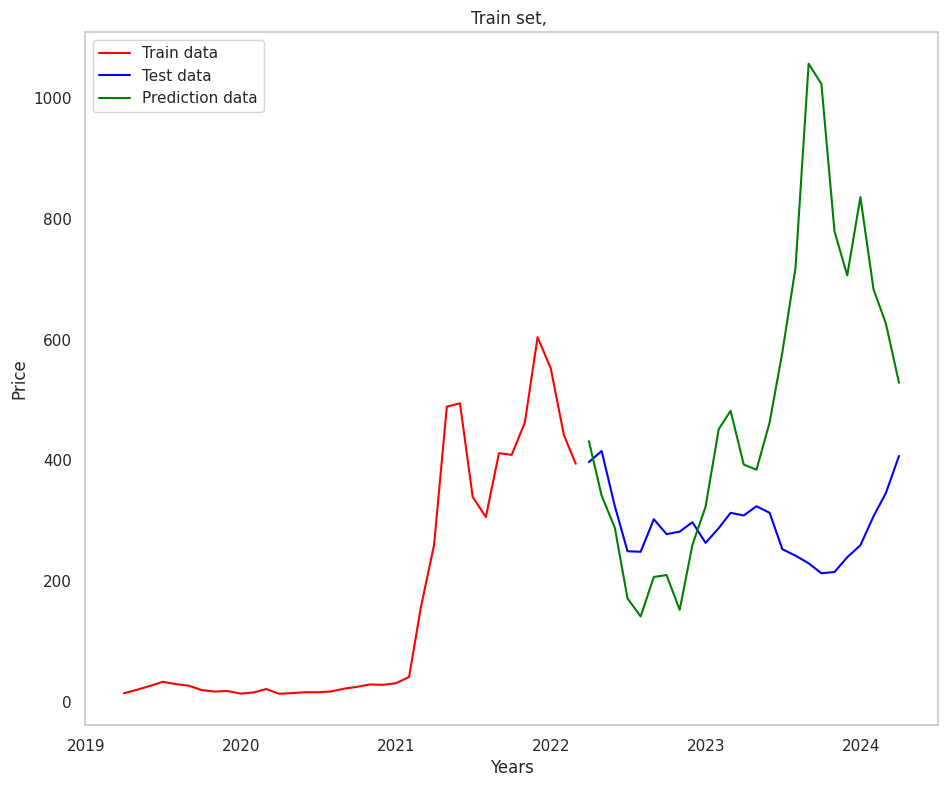

In [ ]:
plt.plot(train, color = "red", label ='Train data')
plt.plot(test, color = "blue", label = 'Test data')
plt.plot(predictions, color = "green", label = 'Prediction data')

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()
plt.legend()
plt.show()

In [ ]:
# forecast period from the end of available data
start = len(df_monthly)
end = (len(df_monthly) - 1) + 1

forecast = result.predict(start, end)

# let's look at the forecast for the whole of 2023
#forecast[-12:]

In [ ]:
start = len(df_monthly)

end = (len(df_monthly) -1) + 2

forecast_1 = result.predict(start, end)

In [ ]:
start = len(df_monthly)

end = (len(df_monthly) -1 ) + 3

forecast_2 = result.predict(start, end)

In [ ]:
start = len(df_monthly)

end = (len(df_monthly) -1 ) + 4

forecast_3 = result.predict(start, end)

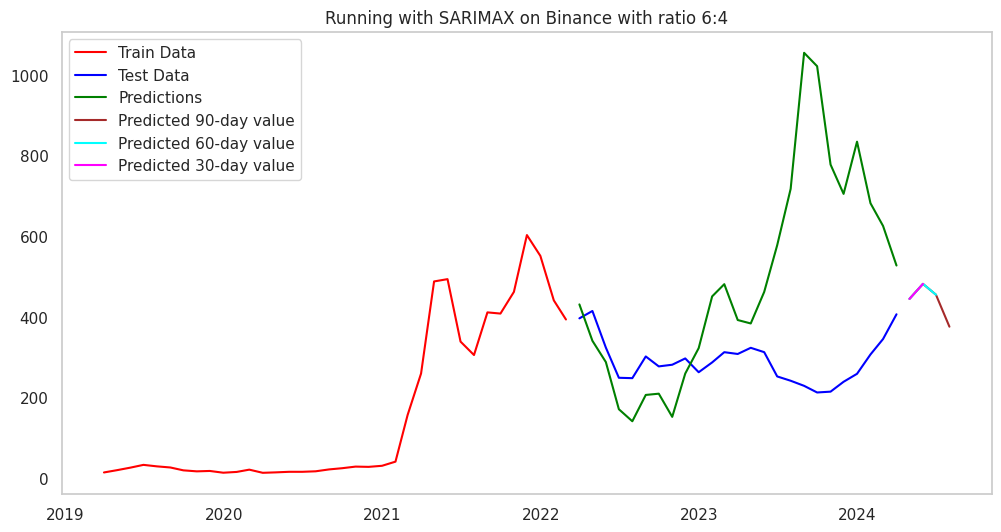

In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_3, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_2, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_1, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("Running with SARIMAX on Binance with ratio 6:4")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


In [ ]:
print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.9708670450215354
MAE =  246.57478522633602
RMSE =  341.7147992628738


###Split data with ratio 7:3




In [ ]:
window_size = 10
feature_dim = 5

train_size = 0.7
test_size = 0.3

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [ ]:
df = eth_df[['Price']].copy()


In [ ]:
df_monthly = df.resample('M').mean() # changing the step from "daily on weekdays" to "monthly average"
df_monthly.head()

,Price
Date,
2019-03-31,14.959677
2019-04-30,20.614333
2019-05-31,26.913548
2019-06-30,33.775333
2019-07-31,30.068387


<Axes: xlabel='Date'>

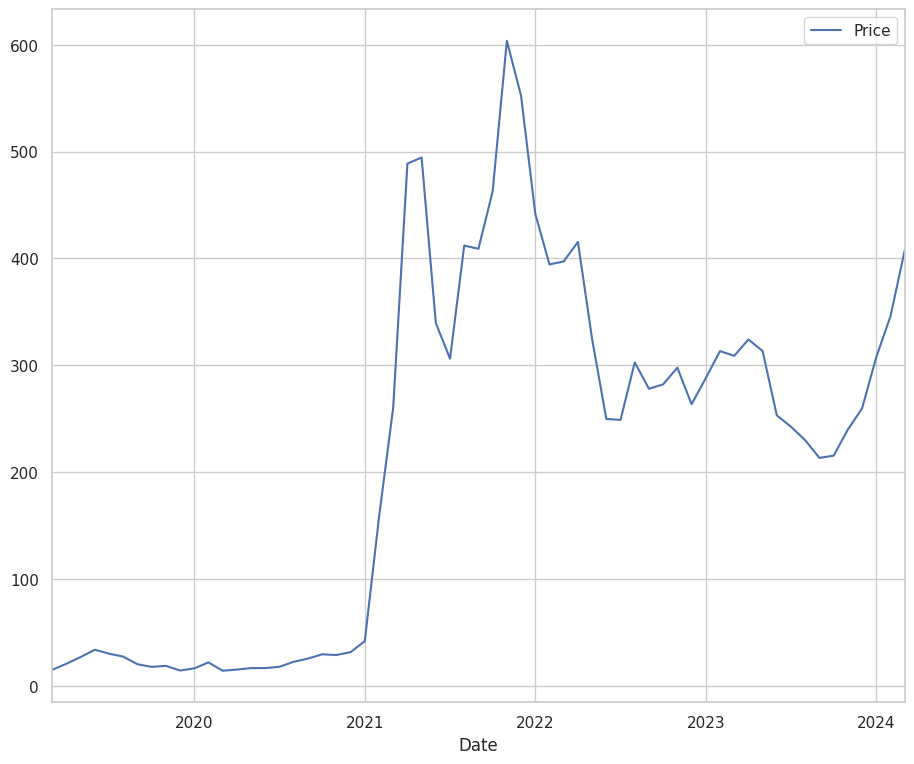

In [ ]:
# Let's plot our data
df_monthly.plot()

In [ ]:
train_index = int(len(df_monthly)*train_size)
train_index

42

In [ ]:
len(df_monthly)

61

In [ ]:
# the training set will include data up to and including December 2016
train = df_monthly[:train_index]

# test set will start from January 2017 (essentially one year)
test = df_monthly[train_index:]

In [ ]:
print(len(train))


42


In [ ]:
print(len(test))

19


In [ ]:
# forcibly disable system warnings
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

# let's train the model with the appropriate parameters, SARIMAX(0, 2, 2)x(0, 2, 2, 12)
# importing the model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# let's create an object of this model
model = SARIMAX(train,
                 order = (3,0,0),
                seasonal_order = (2,1,0,7),
                enforce_stationarity = False,
                enforce_invertibility = False)

# apply the method fit
result = model.fit(maxiter = 500, method = 'nm')

Optimization terminated successfully.
         Current function value: 2.463521
         Iterations: 353
         Function evaluations: 559


In [ ]:
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Price   No. Observations:                   42
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 7)   Log Likelihood                -103.468
Date:                           Wed, 19 Jun 2024   AIC                            218.936
Time:                                   11:50:13   BIC                            224.278
Sample:                               03-31-2019   HQIC                           219.672
                                    - 08-31-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2967      0.414      3.135      0.002       0.486       2.107
ar.L2         -0.5901      0.513     -1.150      0.250      -1.596       0.415
ar.L3          0.2782      0.267      1.041      0.298      -0.246       0.802
ar.S.L7       -0.6916      0.424     -1.633      0.103      -1.522       0.139
ar.S.L14      -1.0650      0.872     -1.222      0.222      -2.773       0.643
sigma2      5759.2011   2515.201      2.290      0.022     829.497    1.07e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 7.69
Prob(Q):                              0.77   Prob(JB):                         0.02
Heteroskedasticity (H):               0.19   Skew:                             1.22
Prob(H) (two-sided):                  0.07   Kurtosis:                         5.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# the test forecast period will start from the end of the training period
start = len(train)

# and it will end at the end of the test
end = len(train) + len(test) - 1

# apply the method predict
predictions = result.predict(start, end)
predictions

2022-09-30    305.371759
2022-10-31    265.726426
2022-11-30    387.633783
2022-12-31    446.179010
2023-01-31    611.353755
                 ...    
2023-11-30    664.504952
2023-12-31    708.668003
2024-01-31    686.914932
2024-02-29    597.777051
2024-03-31    522.955465
Freq: M, Name: predicted_mean, Length: 19, dtype: float64

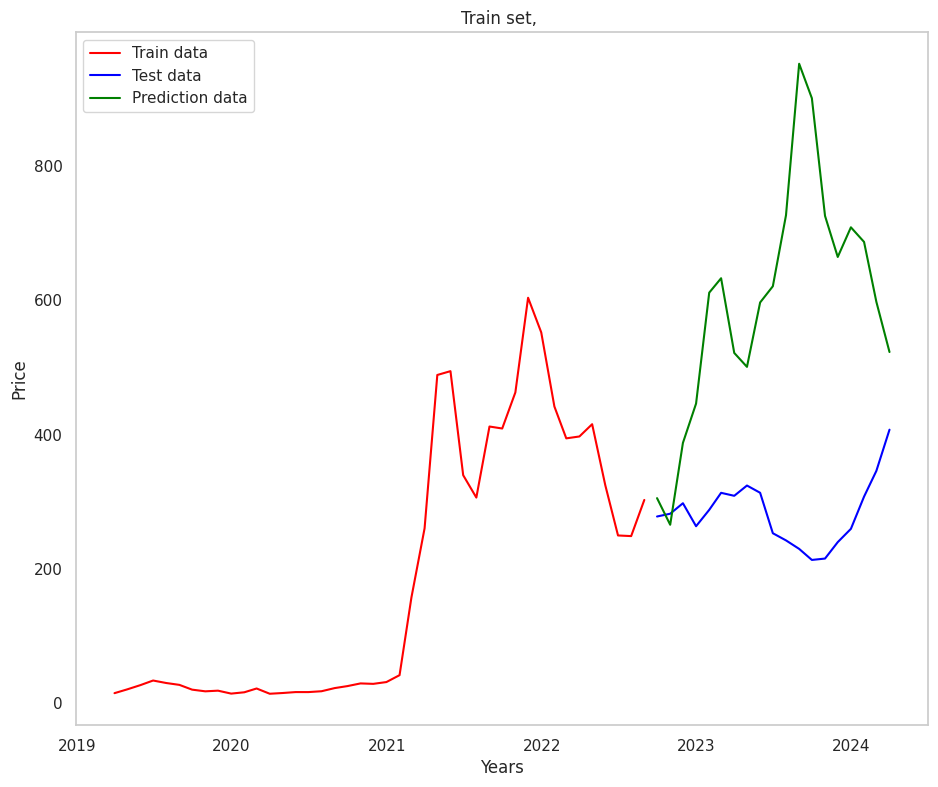

In [ ]:
plt.plot(train, color = "red", label ='Train data')
plt.plot(test, color = "blue", label = 'Test data')
plt.plot(predictions, color = "green", label = 'Prediction data')

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()
plt.legend()
plt.show()

In [ ]:
# forecast period from the end of available data
start = len(df_monthly)
end = (len(df_monthly) - 1) + 1

forecast = result.predict(start, end)

# let's look at the forecast for the whole of 2023
#forecast[-12:]

In [ ]:
start = len(df_monthly)

end = (len(df_monthly) -1) + 2

forecast_1 = result.predict(start, end)

In [ ]:
start = len(df_monthly)

end = (len(df_monthly) -1 ) + 3

forecast_2 = result.predict(start, end)

In [ ]:
start = len(df_monthly)

end = (len(df_monthly) -1 ) + 4

forecast_3 = result.predict(start, end)

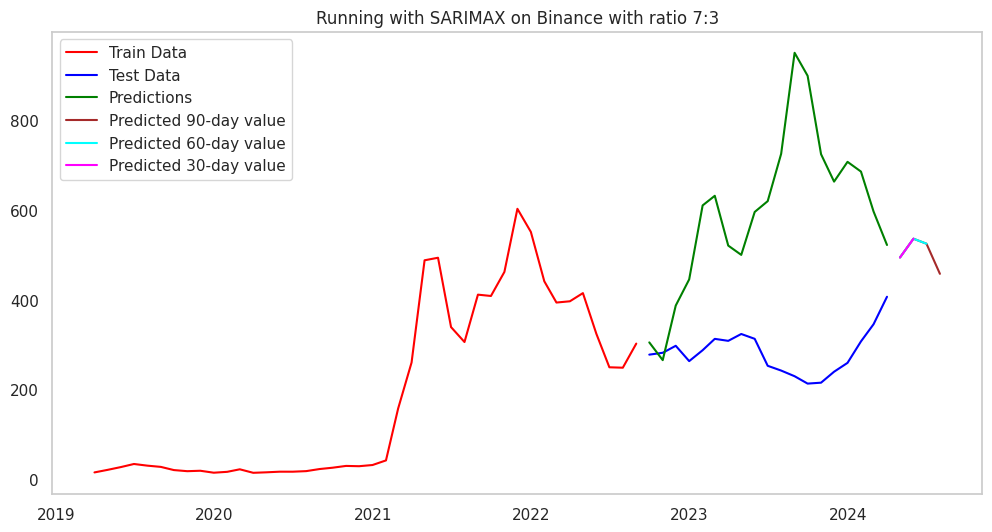

In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_3, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_2, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_1, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("Running with SARIMAX on Binance with ratio 7:3")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


In [ ]:
print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.9708670450215354
MAE =  246.57478522633602
RMSE =  341.7147992628738


###Split data with ratio 8:2




In [ ]:
window_size = 10
feature_dim = 5

train_size = 0.8
test_size = 0.2

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [ ]:
df = eth_df[['Price']].copy()


In [ ]:
df_monthly = df.resample('M').mean() # changing the step from "daily on weekdays" to "monthly average"
df_monthly.head()

,Price
Date,
2019-03-31,14.959677
2019-04-30,20.614333
2019-05-31,26.913548
2019-06-30,33.775333
2019-07-31,30.068387


<Axes: xlabel='Date'>

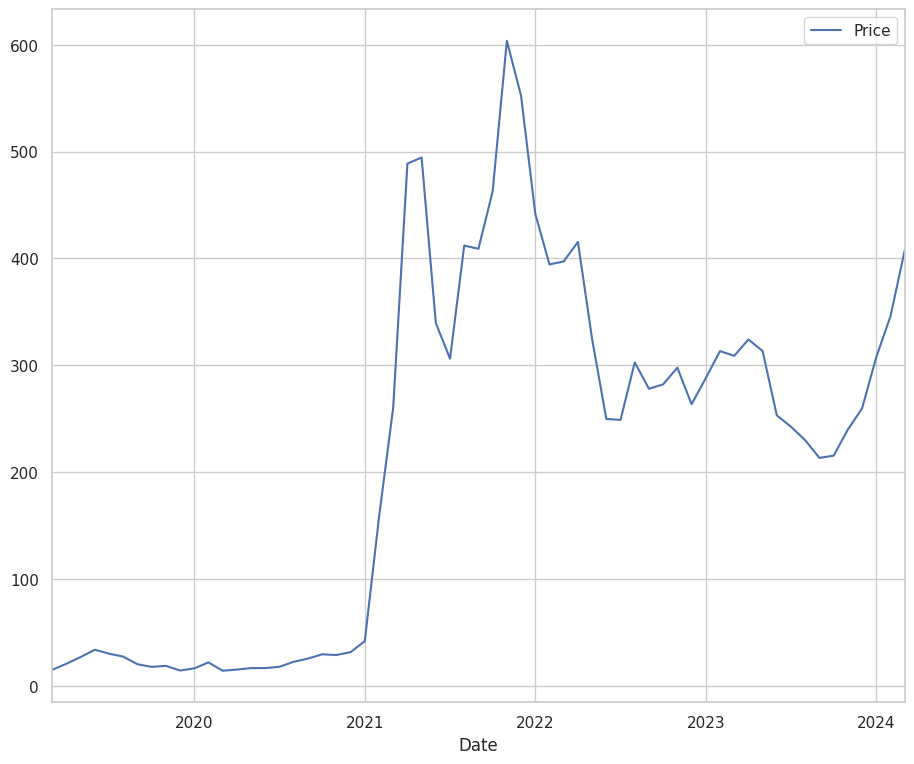

In [ ]:
# Let's plot our data
df_monthly.plot()

In [ ]:
train_index = int(len(df_monthly)*train_size)
train_index

48

In [ ]:
len(df_monthly)

61

In [ ]:
# the training set will include data up to and including December 2016
train = df_monthly[:train_index]

# test set will start from January 2017 (essentially one year)
test = df_monthly[train_index:]

In [ ]:
print(len(train))


48


In [ ]:
print(len(test))

13


In [ ]:
# forcibly disable system warnings
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

# let's train the model with the appropriate parameters, SARIMAX(0, 2, 2)x(0, 2, 2, 12)
# importing the model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# let's create an object of this model
model = SARIMAX(train,
                 order = (3,0,0),
                seasonal_order = (2,1,0,7),
                enforce_stationarity = False,
                enforce_invertibility = False)

# apply the method fit
result = model.fit(maxiter = 500, method = 'nm')

Optimization terminated successfully.
         Current function value: 2.850645
         Iterations: 337
         Function evaluations: 535


In [ ]:
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Price   No. Observations:                   48
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 7)   Log Likelihood                -136.831
Date:                           Wed, 19 Jun 2024   AIC                            285.662
Time:                                   11:53:53   BIC                            292.730
Sample:                               03-31-2019   HQIC                           287.537
                                    - 02-28-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2525      0.329      3.809      0.000       0.608       1.897
ar.L2         -0.5057      0.409     -1.236      0.216      -1.307       0.296
ar.L3          0.1969      0.192      1.023      0.306      -0.180       0.574
ar.S.L7       -0.4660      0.319     -1.460      0.144      -1.092       0.160
ar.S.L14      -0.7030      0.273     -2.572      0.010      -1.239      -0.167
sigma2      5243.2910   1903.171      2.755      0.006    1513.144    8973.438
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 8.74
Prob(Q):                              0.80   Prob(JB):                         0.01
Heteroskedasticity (H):               0.20   Skew:                             1.08
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# the test forecast period will start from the end of the training period
start = len(train)

# and it will end at the end of the test
end = len(train) + len(test) - 1

# apply the method predict
predictions = result.predict(start, end)
predictions

2023-03-31    276.669037
2023-04-30    255.846035
2023-05-31    330.570595
2023-06-30    332.106409
2023-07-31    374.156538
2023-08-31    505.243705
2023-09-30    483.694381
2023-10-31    374.593350
2023-11-30    336.689319
2023-12-31    378.292869
2024-01-31    388.931076
2024-02-29    356.234510
2024-03-31    368.457848
Freq: M, Name: predicted_mean, dtype: float64

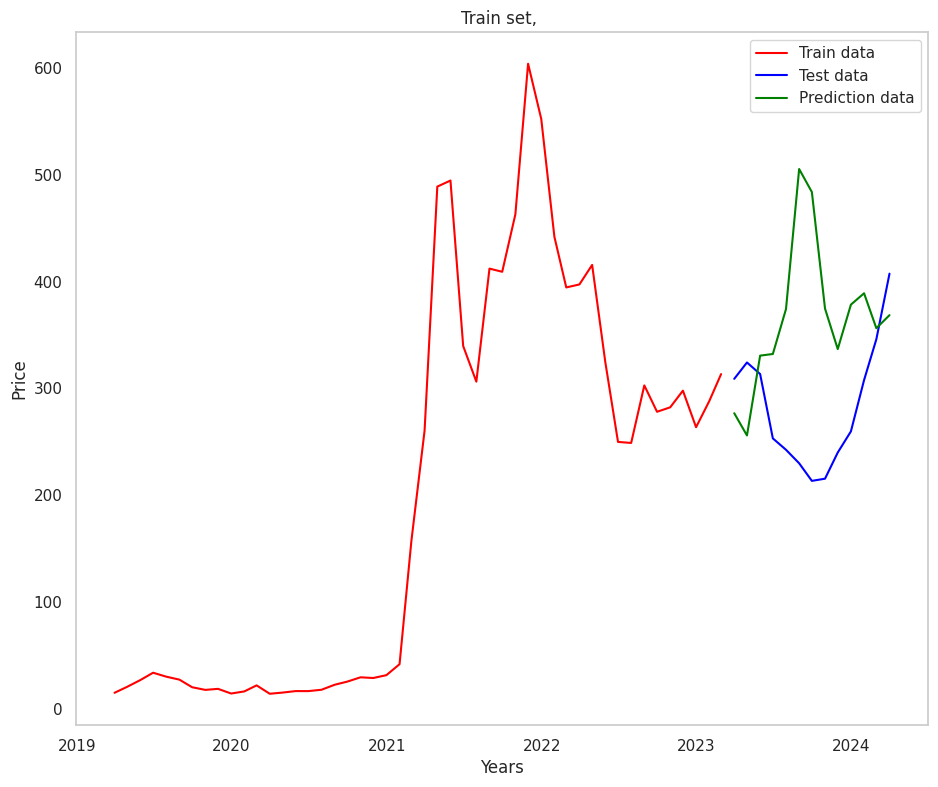

In [ ]:
plt.plot(train, color = "red", label ='Train data')
plt.plot(test, color = "blue", label = 'Test data')
plt.plot(predictions, color = "green", label = 'Prediction data')

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()
plt.legend()
plt.show()

In [ ]:
# forecast period from the end of available data
start = len(df_monthly)
end = (len(df_monthly) - 1) + 1

forecast = result.predict(start, end)

# let's look at the forecast for the whole of 2023
#forecast[-12:]

In [ ]:
start = len(df_monthly)

end = (len(df_monthly) -1) + 2

forecast_1 = result.predict(start, end)

In [ ]:
start = len(df_monthly)

end = (len(df_monthly) -1 ) + 3

forecast_2 = result.predict(start, end)

In [ ]:
start = len(df_monthly)

end = (len(df_monthly) -1 ) + 4

forecast_3 = result.predict(start, end)

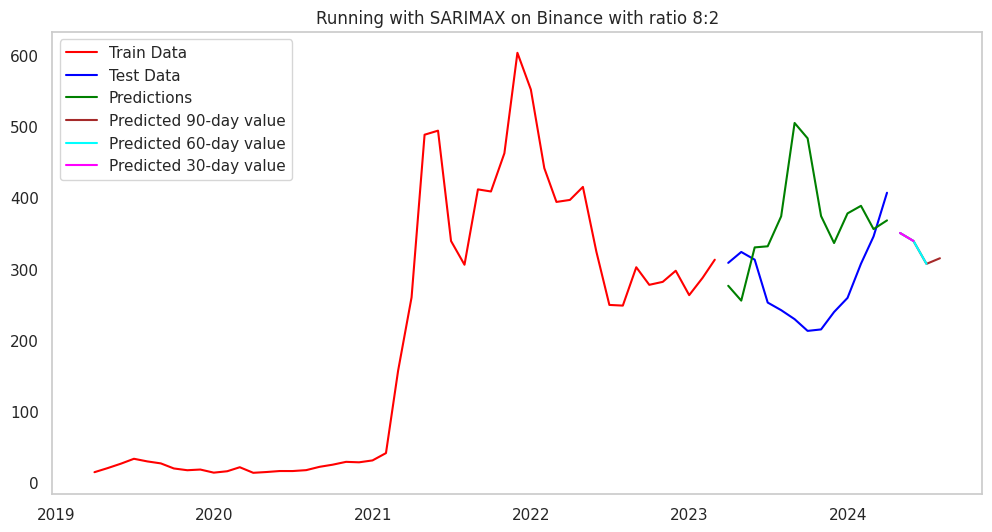

In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_3, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_2, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_1, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("Running with SARIMAX on Binance with ratio 8:2")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


In [ ]:
print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.43694232604531263
MAE =  106.10336140872863
RMSE =  134.61173559020028
